# introduction to the dataset

* Top 5 books to learn computer science and programming 

I used Top 270 Computer Science / Programing Books dataset that is taken from Kaggel which holds a list of 270 books about computer science and programming topics constructed using many websites which provide information on books rating to get you to see the top five books to learn computer science and programming from .


from this dataset we want to answer these three questions 
* What are the top five computer science and programming books to learn from based on rating?
* Does the book with the highest reviews the best to learn from?
* are books with the highest rating expensive?


# Importing packages 


In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid')
import textwrap
import warnings
warnings.filterwarnings('ignore')


# Downloading the dataset


In [3]:
dataset = 'https://www.kaggle.com/datasets/thomaskonstantin/top-270-rated-computer-science-programing-books'

In [4]:
od.download(dataset)

Skipping, found downloaded files in "./top-270-rated-computer-science-programing-books" (use force=True to force download)


In [5]:
#data_dir = './top-270-rated-computer-science-programing-book'

In [6]:
#os.listdir(data_dir)


# Reading from the dataset


In [7]:
df = pd.read_csv('prog_book.csv')

In [8]:
df.head()

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price
0,4.17,"3,829",The Elements of Style,This style manual offers practical advice on i...,105,Hardcover,9.323529
1,4.01,"1,406","The Information: A History, a Theory, a Flood","James Gleick, the author of the best sellers C...",527,Hardcover,11.000000
2,3.33,0,Responsive Web Design Overview For Beginners,In Responsive Web Design Overview For Beginner...,50,Kindle Edition,11.267647
3,3.97,"1,658",Ghost in the Wires: My Adventures as the World...,If they were a hall of fame or shame for compu...,393,Hardcover,12.873529
4,4.06,"1,325",How Google Works,Both Eric Schmidt and Jonathan Rosenberg came ...,305,Kindle Edition,13.164706



# Data understanding 


<span style="color:red"> Data describtion :</span>

In [9]:
df.describe()

,Rating,Number_Of_Pages,Price
count,271.000000,271.000000,271.000000
mean,4.067417,475.077491,54.541860
std,0.290749,306.147492,35.711485
min,3.000000,50.000000,9.323529
25%,3.915000,289.000000,30.751471
50%,4.100000,384.000000,46.317647
75%,4.250000,572.500000,67.854412
max,5.000000,3168.000000,235.650000


<span style="color:red"> More detales about attributes info  :</span>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


<span style="color:red"> Number of instances :</span>

In [11]:
print (len(df))

271


<span style="color:green"> The length of the dataset is 271 </span>

<span style="color:red"> Number of rows and columns :</span>

In [12]:
df.shape

(271, 7)

<span style="color:green"> As we can see there are 271 rows and 7 columns</span>

# pair plot seaborn

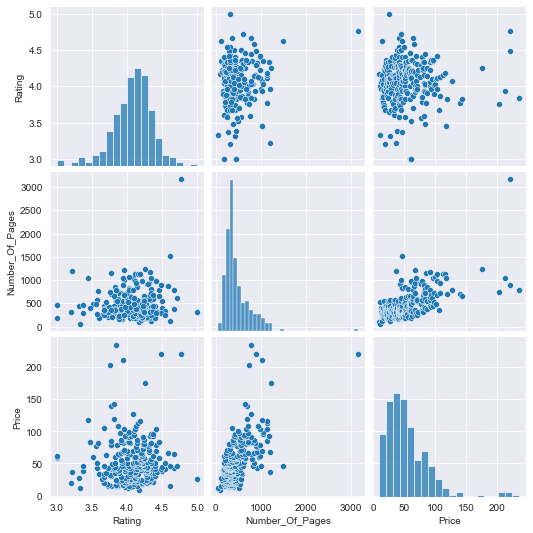

In [13]:
sns.pairplot(df)

<span style="color:green">To understand the best set of features to explain a relationship between two variables </span>

# Distribution

Enter column name :Rating


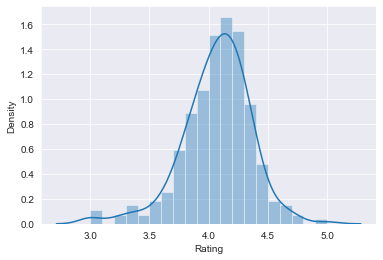

In [14]:
def Distribution ():
    '''
    This function provide the Distribution for any column 

    Input:
    Col


    Output:
    Distribution plot of the column name
    
    '''

    col = input("Enter column name :")
    sns.distplot(df[col]);
 
    
Distribution()


# Checking null values

In [15]:
df.isna().sum()

Rating             0
Reviews            0
Book_title         0
Description        0
Number_Of_Pages    0
Type               0
Price              0
dtype: int64

<span style="color:green"> As we can see the output showed us that there are no missing values </span>

# changing data type for some attributes 

In [16]:
df['Reviews'] = df.Reviews.apply(lambda x: x.replace(',', '') if ',' in x else x)
df['Reviews'] = pd.to_numeric(df.Reviews)

<span style="color:green"> I changed the reviews from object to int so i can get the top fifteen books based on reviewing  </span>

# Cleaning the dataset


<span style="color:red"> delete the dublicated book title name :  </span>

In [17]:
df = df.drop_duplicates(subset='Book_title', keep='first')

# The top five Computer science and programming books based on rating 

<span style="color:red"> By using this method we can get the top five books based on attribute (rating) :  </span>

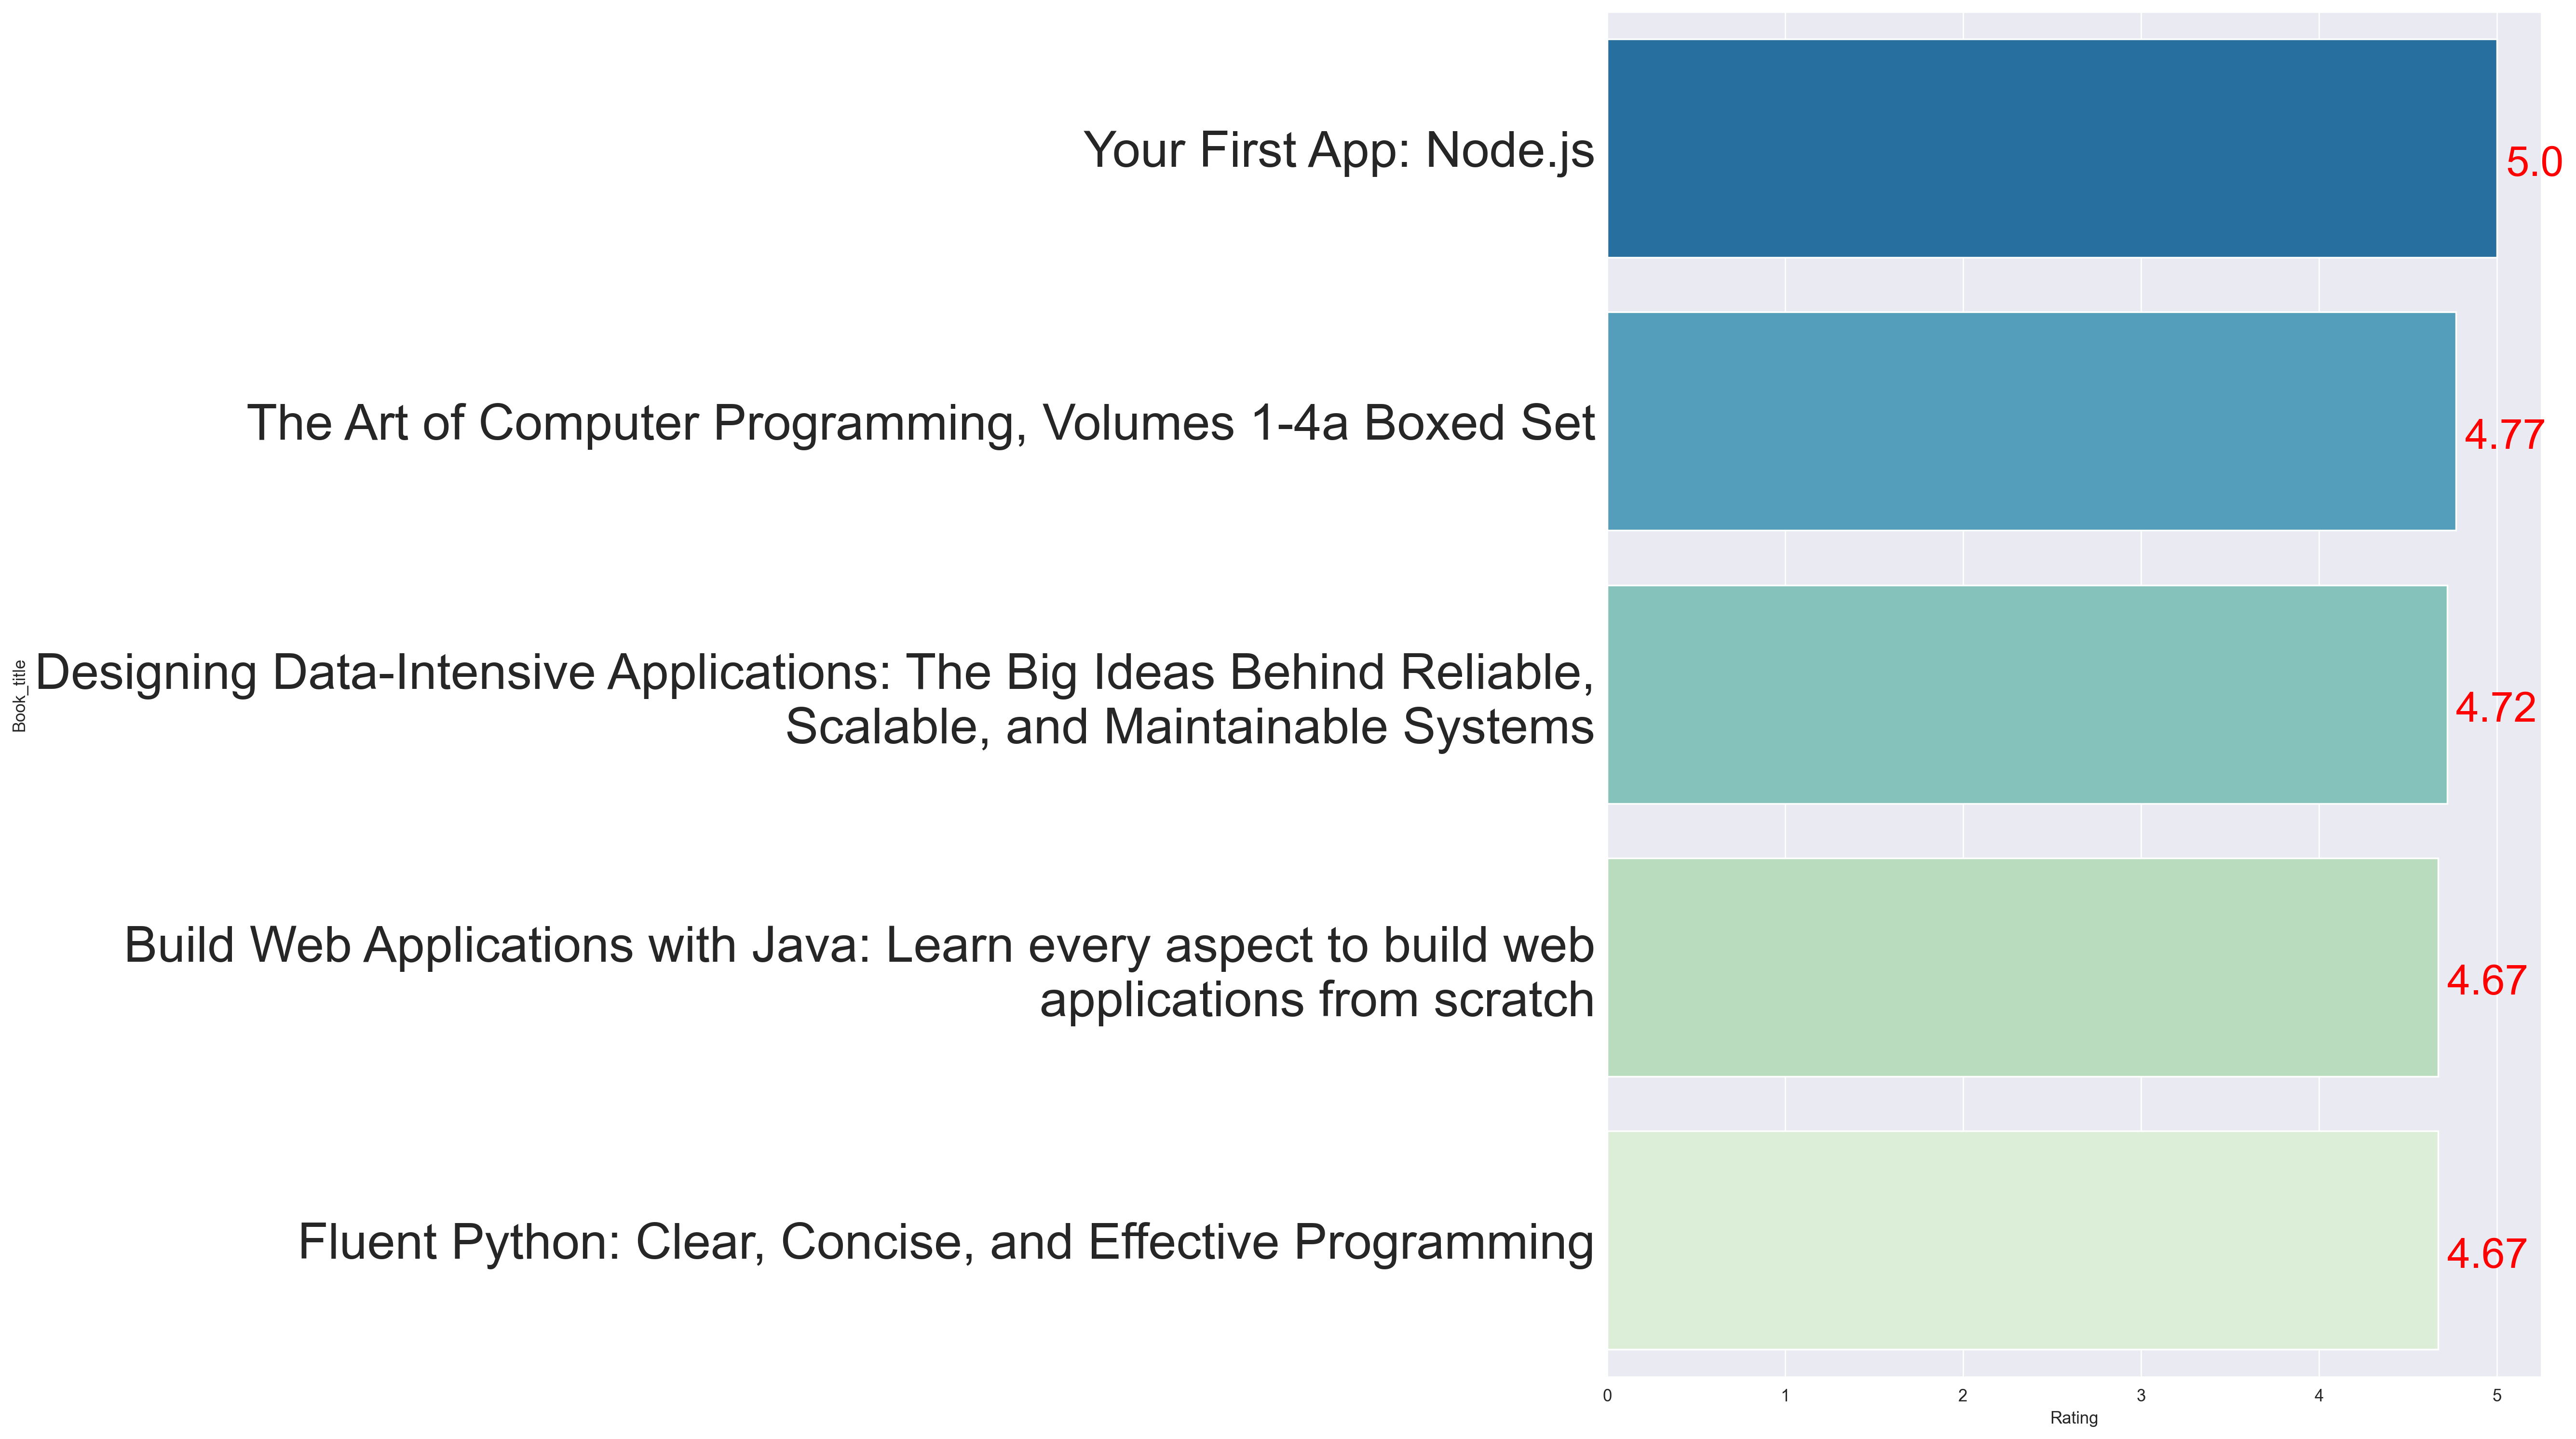

In [18]:
top_five = df.sort_values(by=['Rating'], ascending=False)
top_five = top_five[0:5]
plt.figure(figsize=(10,15),dpi=250)
ax = sns.barplot(top_five['Rating'], top_five['Book_title'],palette='GnBu_r')
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=30)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 25, color = 'red')
plt.show()

<span style="color:green"> *And these are the results listed as shown above*</span>

# The top fifteen Computer science and programming books based on reviewing

<span style="color:red">  By using the same method we can get the top fifteen books based on reviewing to compare it with the top five :  </span>

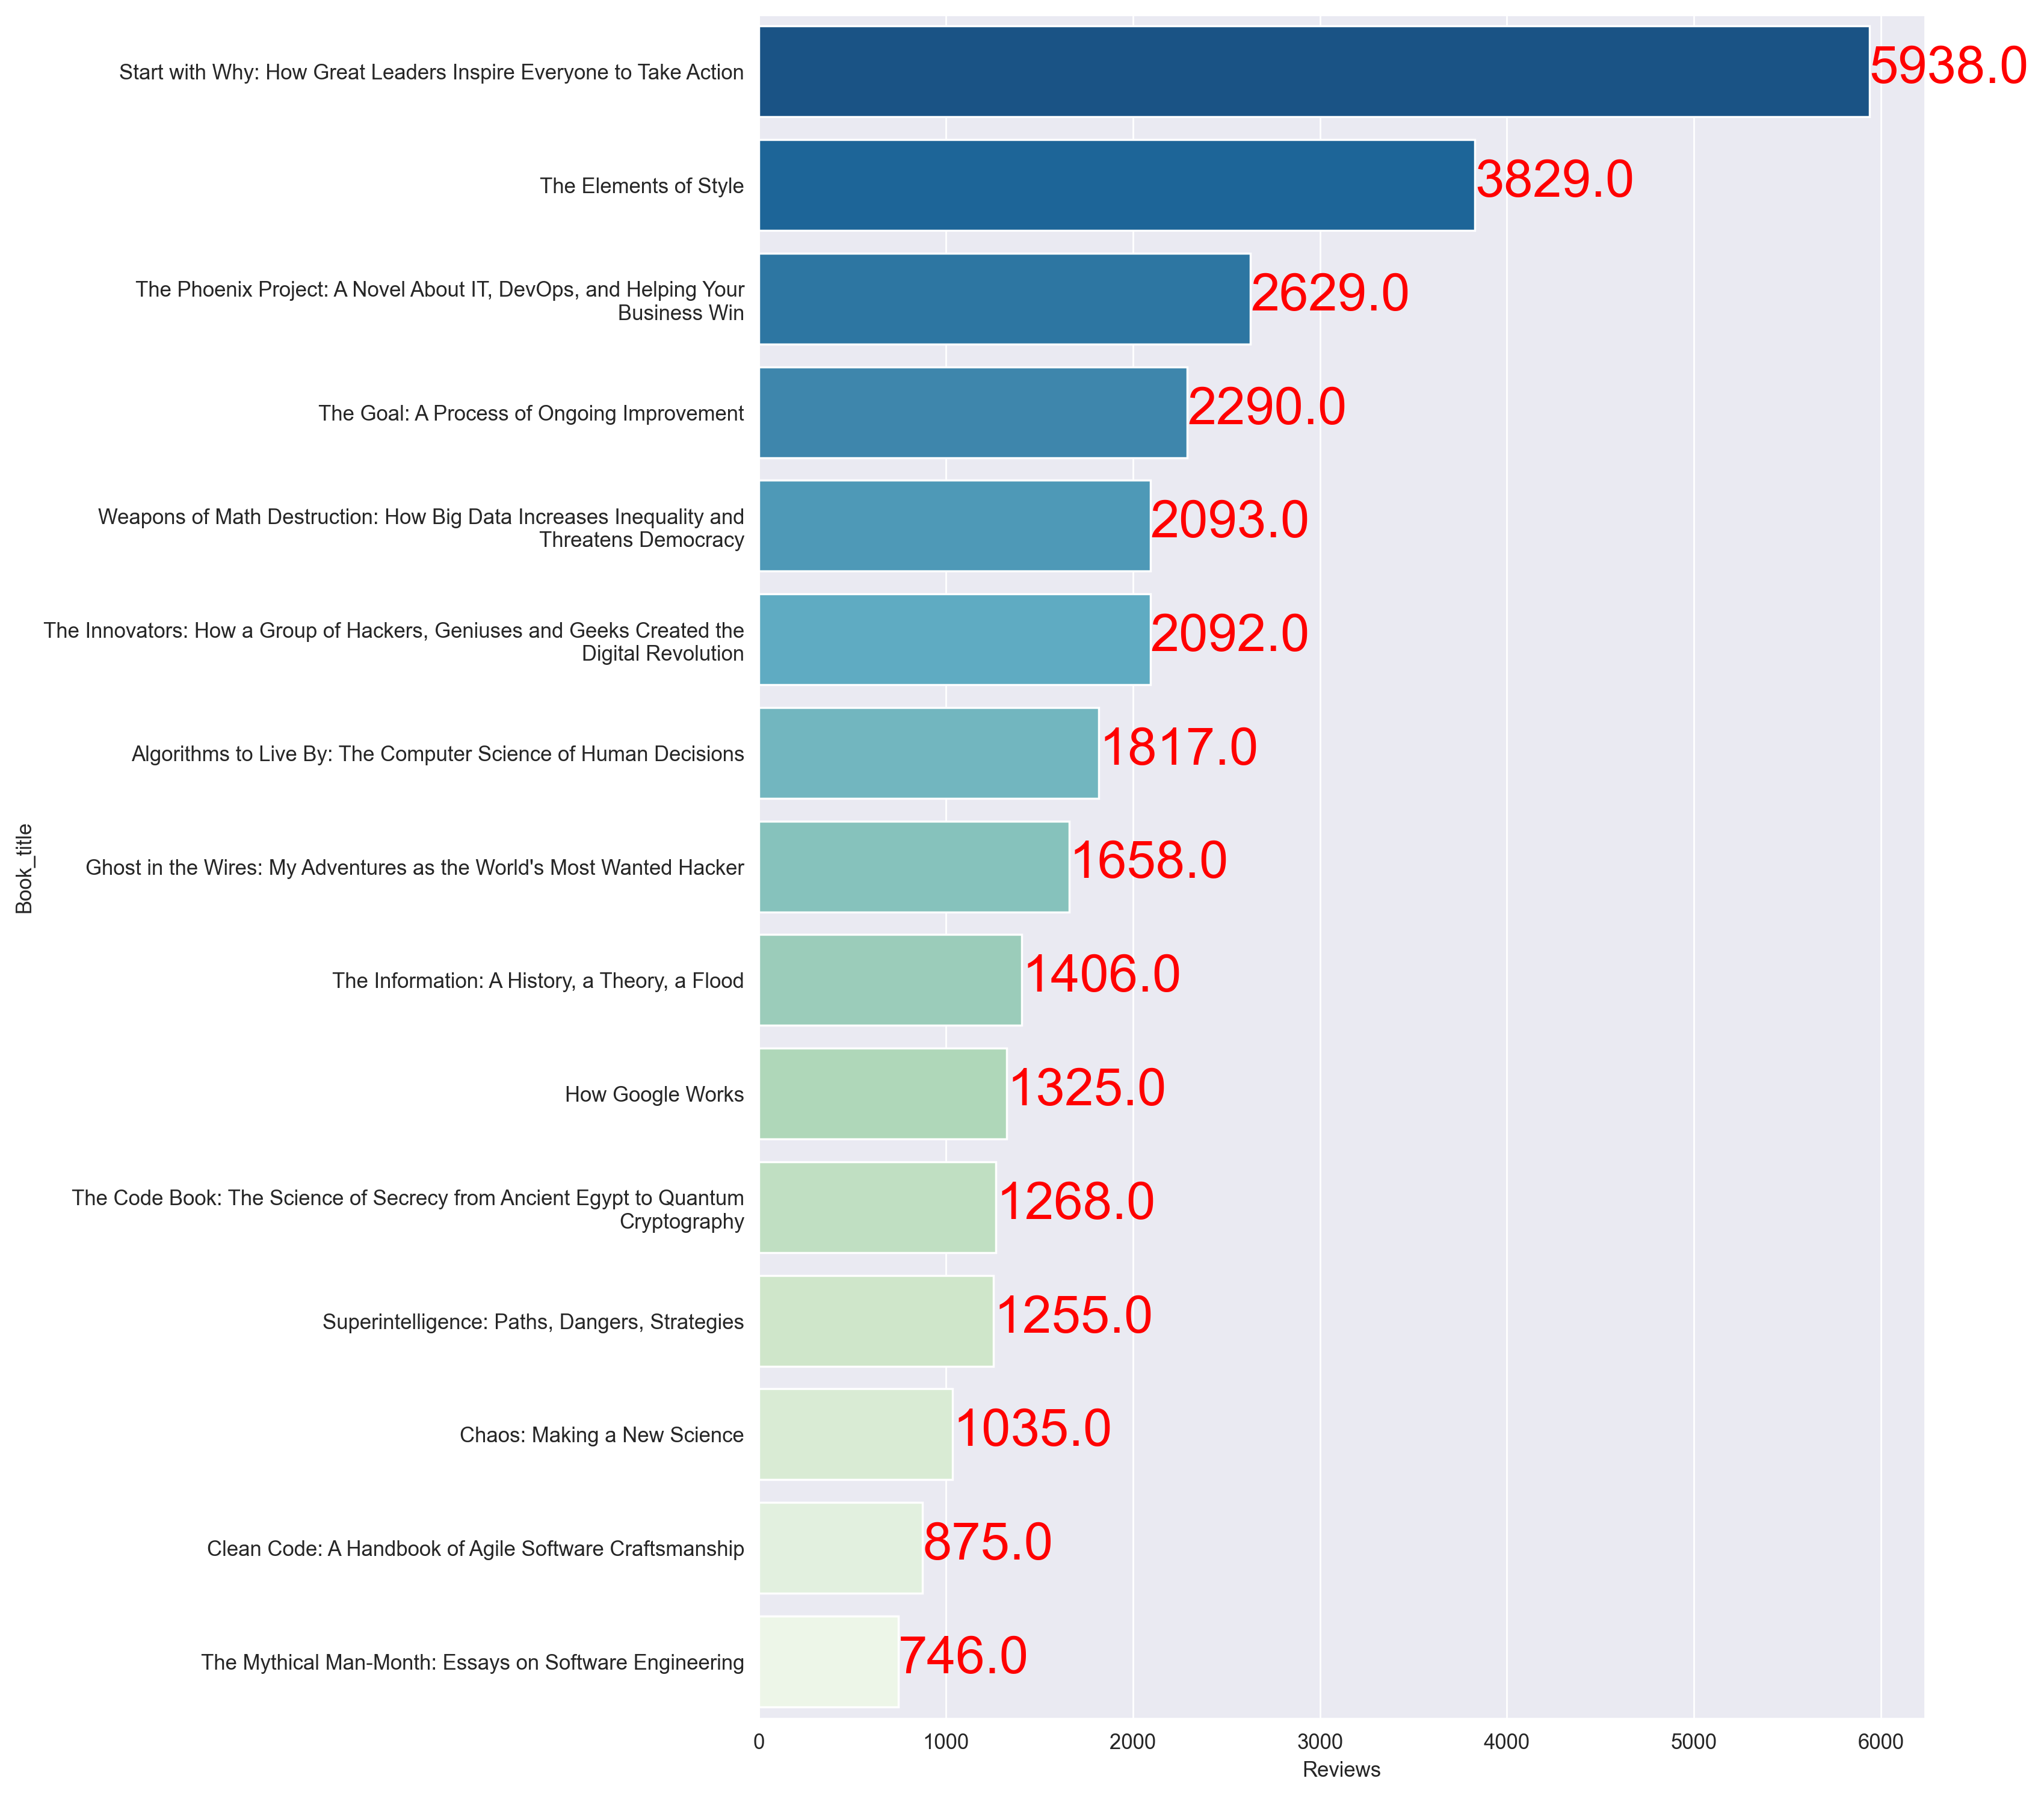

In [19]:
top_five = df.sort_values(by=['Reviews'], ascending=False)
top_five = top_five[0:15]
plt.figure(figsize=(10,15),dpi=250)
ax = sns.barplot(top_five['Reviews'], top_five['Book_title'],palette='GnBu_r')
ax.set_yticklabels(textwrap.fill(y.get_text()) for y in ax.get_yticklabels())
ax.tick_params(axis="y", labelsize=10)

for i in ax.patches:
    ax.text(i.get_width() + .05, i.get_y() + 0.5, str(i.get_width()), fontsize = 25, color = 'red')
plt.show()

# The relationship between Rating and Price

<span style="color:red">Finally using this method as shown below to display the relationship between price and rating :  </span>

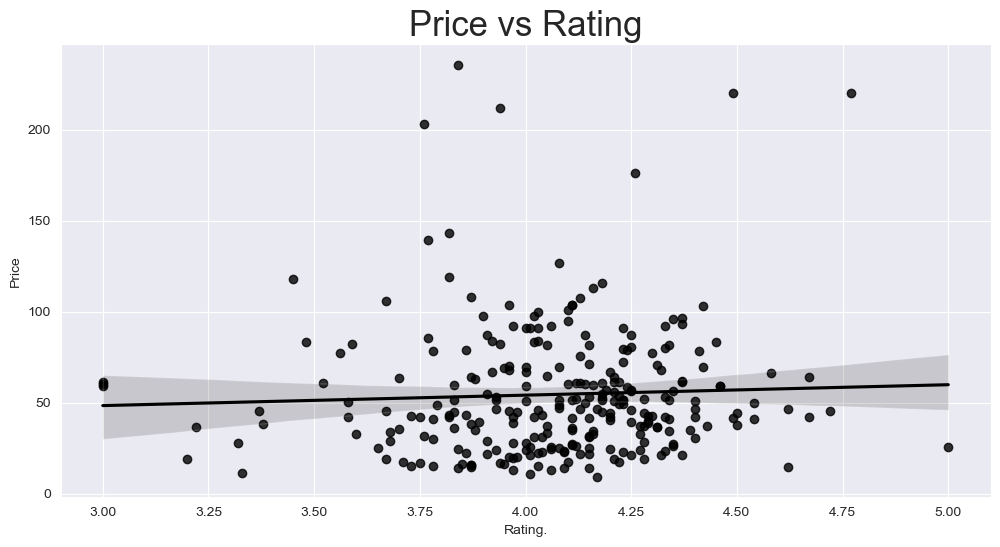

In [21]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Rating',y='Price',data=df,color='Black')
plt.xlabel('Rating.')
plt.ylabel('Price')
plt.title('Price vs Rating',fontsize = 25)
plt.show()

# conclustion 

* What is the top five computer science and programming books to learn from based on rating ?

<span style="color:green"> 1)	Your First App: Node.js</span>

<span style="color:green">2)	The Art of Computer Programming, Voilumes 1-4a Boxed Set </span>

<span style="color:green">3)	Designing Data-Intensive Application: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems </span>

<span style="color:green">4)	Build Web Applications With Java: Learn every aspect to build web applications from scratch </span>

<span style="color:green">5)	Fluent Python: Clear, Concise, and Effective Programming  </span>


* Does the book with the highest reviews the best to learn from ?

<span style="color:green">we can know the answer to the question as comparing the top 15 based on reviewing and the books that i recomanded to learn from which is based on rating and the results showed us that there are no single matching .
nothing from the top five list showed in the top fifteen list </span>


* Do books with the highest rating expensive?

<span style="color:green">from the price and rating relationship figure we can see that it is not necessary that the books with the highest rating are also with the highest prices </span>

